The data was taken over a 2-month period in India with 25 features ( eg, red blood cell count, white blood cell count, etc).
<br>The target is the 'classification', which is either 'ckd' or 'notckd' - ckd=chronic kidney disease.
<br>There are 400 rows.

Columns :<br>

+ age - age
+ bp - blood pressure
+ sg - specific gravity
+ al - albumin
+ su - sugar
+ rbc - red blood cells
+ pc - pus cell
+ pcc - pus cell clumps
+ ba - bacteria
+ bgr - blood glucose random
+ bu - blood urea
+ sc - serum creatinine
+ sod - sodium
+ pot - potassium
+ hemo - hemoglobin
+ pcv - packed cell volume
+ wc - white blood cell count
+ rc - red blood cell count
+ htn - hypertension
+ dm - diabetes mellitus
+ cad - coronary artery disease
+ appet - appetite
+ pe - pedal edema
+ ane - anemia
+ class - class 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/home/suyash/Downloads/ckdisease/kidney_disease.csv')

In [3]:
df.shape

(400, 26)

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.drop('id',axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age               391 non-null float64
bp                388 non-null float64
sg                353 non-null float64
al                354 non-null float64
su                351 non-null float64
rbc               248 non-null object
pc                335 non-null object
pcc               396 non-null object
ba                396 non-null object
bgr               356 non-null float64
bu                381 non-null float64
sc                383 non-null float64
sod               313 non-null float64
pot               312 non-null float64
hemo              348 non-null float64
pcv               330 non-null object
wc                295 non-null object
rc                270 non-null object
htn               398 non-null object
dm                398 non-null object
cad               398 non-null object
appet             399 non-null object
pe                399 non-null object
ane       

In [7]:
df.isna().sum()  #number of missing values in particular columns

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [8]:
df.classification.unique() # 3 unique values appear in the data set. However, there is no value called "ckd\t.

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [9]:
df.classification = df.classification.replace('ckd\t','ckd')

In [10]:
df.classification.unique()

array(['ckd', 'notckd'], dtype=object)

#### Changed the target parameter values to 1 and 0 to be able to use the classification algorithms. If the value is "ckd" is 1, if not equal to 0. 

In [11]:
df.classification=[1 if each=="ckd" else 0 for each in df.classification]

In [12]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


#### Replace NaN with mode of that particular attribute

In [13]:
for col in df.columns:
    mode = df[col].mode().values[0]
    df[col] = df[col].fillna(mode)

In [14]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,99.0,...,38,6000,5.2,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,5.2,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


In [15]:
# handling some different values
df.wc=df.wc.replace("\t6200",6200)
df.wc=df.wc.replace("\t8400",8400) 
df.pcv=df.pcv.replace("\t?",0) 
df.wc=df.wc.replace("\t?",0) 
df.rc=df.rc.replace("\t?",0) 

In [16]:
# change the datatype of features
df.pcv=df.pcv.astype(int)
df.wc=df.wc.astype(int)
df.rc=df.rc.astype(float)

### Label Encoding

In [17]:
categorical = df.select_dtypes(include='object').columns # columns having object data type
categorical

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], dtype='object')

In [18]:
# unique values of categorical columns
for col in df.select_dtypes(include='object').columns:
    print(col,"->",df[col].unique())

rbc -> ['normal' 'abnormal']
pc -> ['normal' 'abnormal']
pcc -> ['notpresent' 'present']
ba -> ['notpresent' 'present']
htn -> ['yes' 'no']
dm -> ['yes' 'no' ' yes' '\tno' '\tyes']
cad -> ['no' 'yes' '\tno']
appet -> ['good' 'poor']
pe -> ['no' 'yes']
ane -> ['no' 'yes']


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in categorical:
    le.fit(df[col].drop_duplicates()) 
    df[col] = le.transform(df[col])

In [20]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44,7800,5.2,1,4,1,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,99.0,...,38,6000,5.2,0,3,1,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31,7500,5.2,0,4,1,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32,6700,3.9,1,3,1,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35,7300,4.6,0,3,1,0,0,0,1


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,400.0,51.675000,17.022008,2.000,42.000,55.00,64.000,90.000
bp,400.0,76.575000,13.489785,50.000,70.000,80.00,80.000,180.000
sg,400.0,1.017712,0.005434,1.005,1.015,1.02,1.020,1.025
al,400.0,0.900000,1.313130,0.000,0.000,0.00,2.000,5.000
su,400.0,0.395000,1.040038,0.000,0.000,0.00,0.000,5.000
rbc,400.0,0.882500,0.322418,0.000,1.000,1.00,1.000,1.000
pc,400.0,0.810000,0.392792,0.000,1.000,1.00,1.000,1.000
pcc,400.0,0.105000,0.306937,0.000,0.000,0.00,0.000,1.000
ba,400.0,0.055000,0.228266,0.000,0.000,0.00,0.000,1.000
bgr,400.0,142.642500,76.344226,22.000,99.000,114.50,150.000,490.000


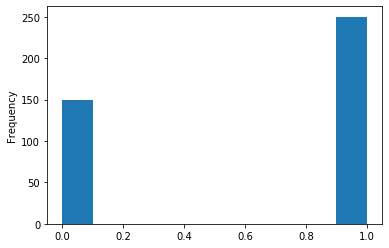

In [22]:
df['classification'].plot(kind='hist') # show dataset is imbalanced

## HeatMap

(25.0, 0.0)

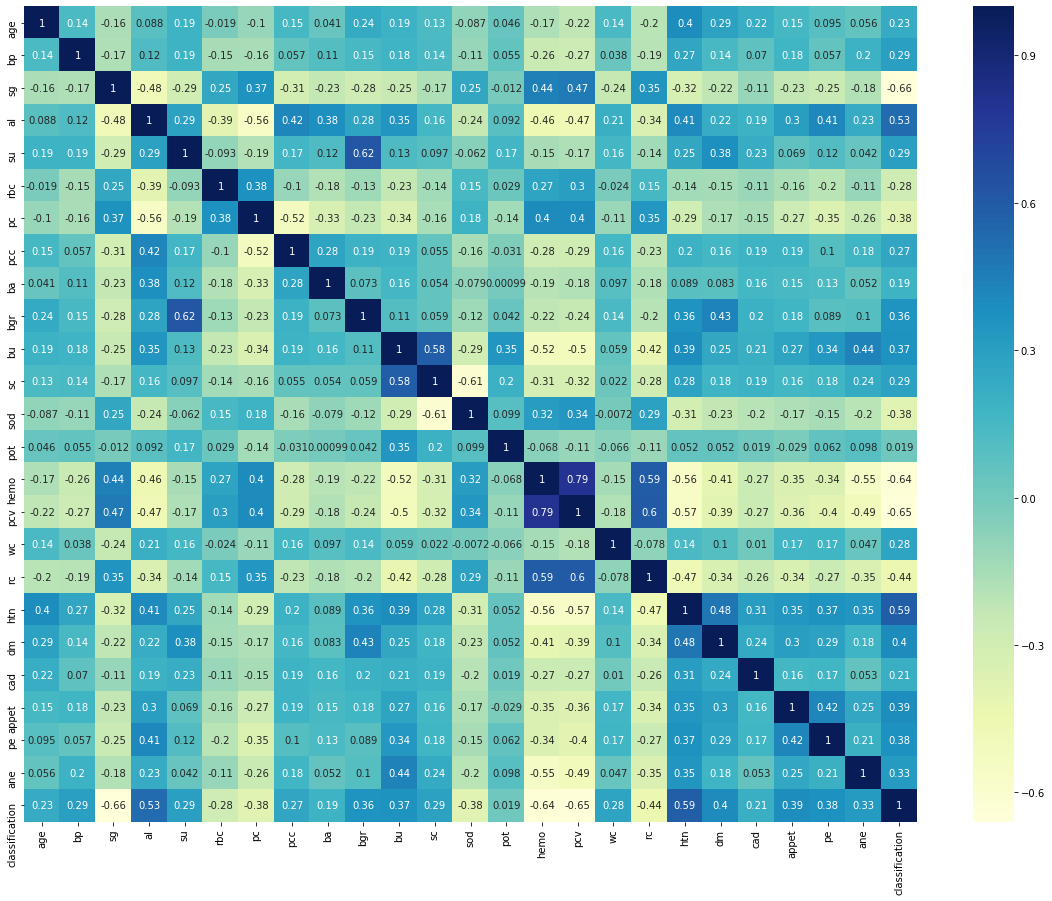

In [23]:
plt.figure(figsize=(20,15))
ax = sb.heatmap(df.corr(),annot=True,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [24]:
Y = df["classification"]
X = df.drop(["classification"],axis=1)

In [25]:
#Normalization
X=(X-np.min(X))/(np.max(X)-np.min(X))

In [26]:
#Preparing the test and training set
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2, shuffle=True)

## Decision Tree (  Splitting Criterion  - Gini Index )

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
dt.score(xtest,ytest)

0.9125

### Top 10 important features

In [30]:
pd.DataFrame({"Importance":dt.feature_importances_},
             index = X.columns).sort_values(by='Importance',
                                            ascending=False)[:10]

,Importance
pcv,0.617709
hemo,0.110965
al,0.092366
sod,0.044911
sc,0.043853
dm,0.038648
bgr,0.018098
rc,0.016977
wc,0.013431
bu,0.003041


In [31]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
ypred = dt.predict(xtest)
ytrue = ytest
cm=confusion_matrix(ytrue , ypred)

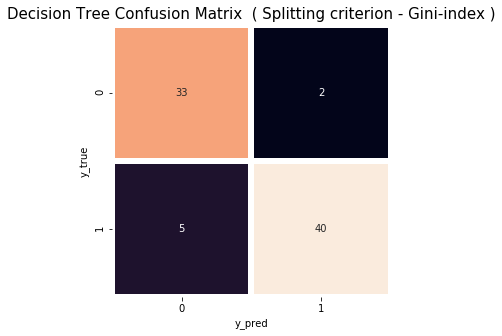

In [32]:
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
ax = sb.heatmap(cm,annot=True,linewidths=5,linecolor="white",fmt=".0f",ax=ax,cbar=False)
bottom, top  = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top -0.5)

plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree Confusion Matrix  ( Splitting criterion - Gini-index )",fontsize=15)
plt.show()

### Plotting Decision Tree of model

In [33]:
from sklearn.tree import plot_tree

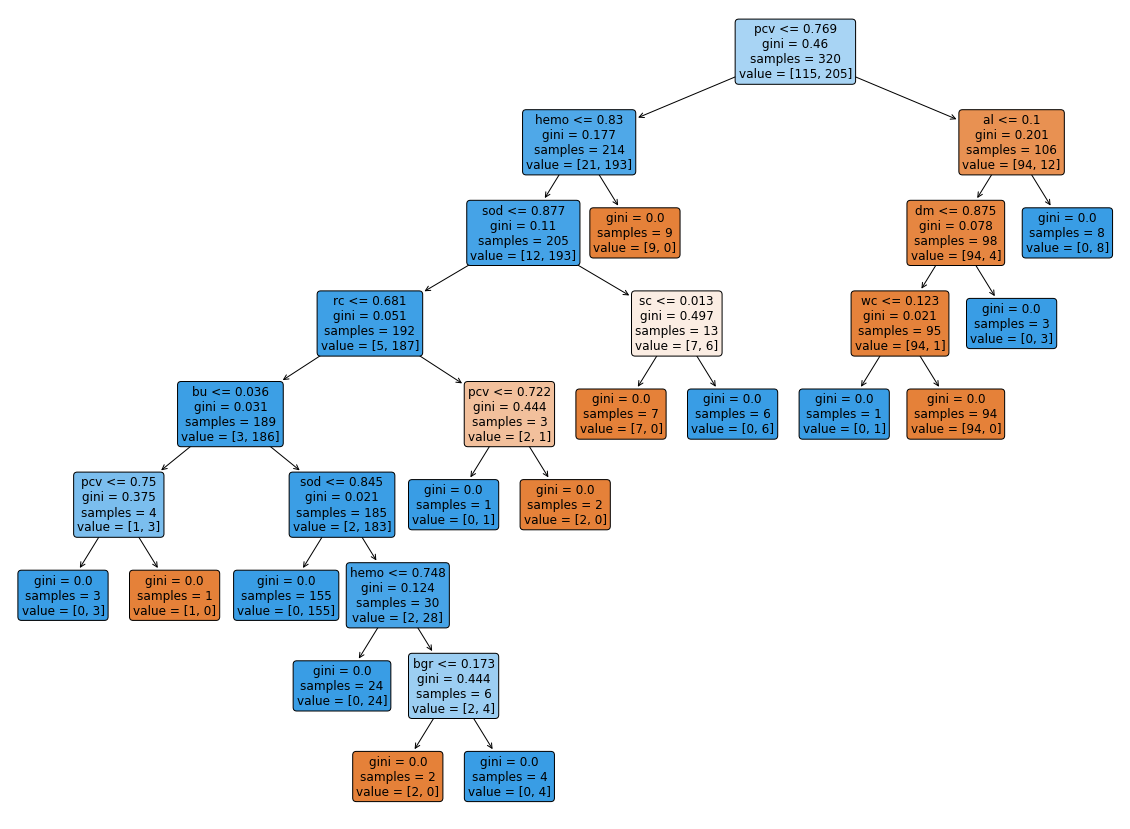

In [34]:
plt.figure(figsize=(20,15))
p = plot_tree(dt,feature_names=X.columns , filled=True , rounded=True , fontsize=12 ) 

## Decision Tree ( Splitting Criterion  - Entropy)

In [35]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
dt.score(xtest,ytest)

1.0

### Top 10 important features

In [37]:
pd.DataFrame({"Importance":dt.feature_importances_},
             index = X.columns).sort_values(by='Importance',
                                            ascending=False)[:10]

,Importance
sc,0.527241
sg,0.260767
al,0.112534
hemo,0.071947
su,0.027511
age,0.000000
pe,0.000000
appet,0.000000
cad,0.000000
dm,0.000000


In [38]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
ypred = dt.predict(xtest)
ytrue = ytest
cm=confusion_matrix(ytrue , ypred)

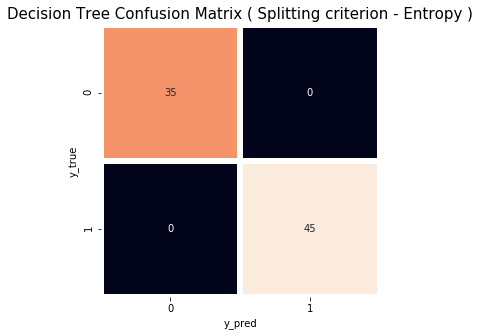

In [39]:
#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
ax = sb.heatmap(cm,annot=True,linewidths=5,linecolor="white",fmt=".0f",ax=ax,cbar=False)
bottom, top  = ax.get_ylim()
ax.set_ylim(bottom + 0.5,top -0.5)

plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Decision Tree Confusion Matrix ( Splitting criterion - Entropy )",fontsize=15)
plt.show()

### Plotting Decision Tree of model

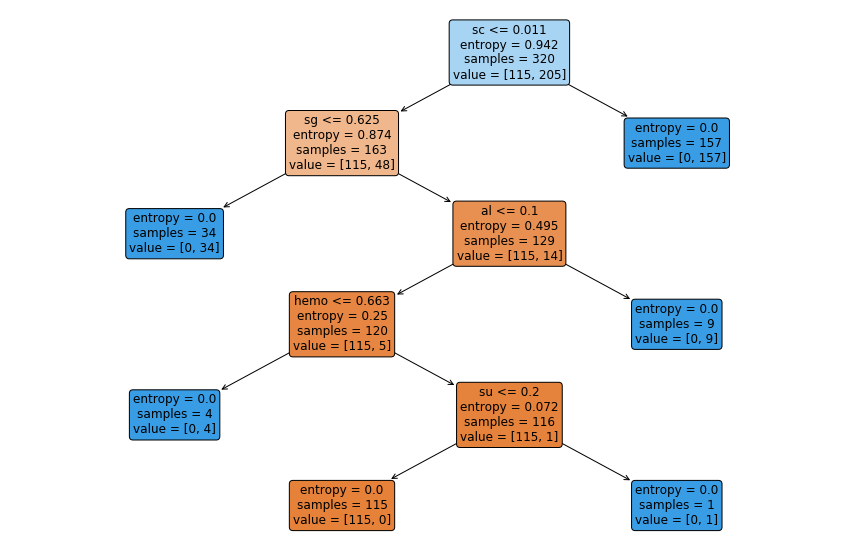

In [40]:
plt.figure(figsize=(15,10))
p = plot_tree(dt,feature_names=X.columns , filled=True , rounded=True , fontsize=12 ) 

# THANK YOU